In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from env import username, password, get_db_url

# db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
# df = pd.read_sql('SELECT * FROM customers', db_url)  


### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?

H0 - ISP has no effect on internet latency

H1 - Network latency has increased after we switched ISP

True Positive - Our network latency increased after we switched

True Negative - there was no change in network latency between ISPs

Type 1 - Our network latency did not increase BUT we rejected the H0

Type 2 - Our network latency did increase BUT we accepted H0

#### - Is the website redesign any good?

H0 - There was no change in customer engagement after our website redesign

H1 - There was an increase in customer engagement after our website redesign

True Positive - Customer engagement DID increase after our website redesign

True Negative - Customer engagement DID NOT increase after our website redesign

Type 1 - Customer engagement DID NOT increase BUT we rejected the H0

Type 2 - Customer engagement DID increase BUT we accepted H0

#### - Is our television ad driving more sales?

H0 - Our television ad had no effect on our sales

H1 - Our television ad increased sales

True Positive - Sales DID increase after our television ad

True Negative - Sales DID NOT increase after our television ad

Type 1 - Sales DID NOT increase BUT we rejected the H0

Type 2 - Sales DID increase BUT we accepted H0

### 1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

A.) One sample t-test : 2 tails

* Are adults who drink milk taller than adults who dont drink milk?

A.) 2 Sample t-test : 1 tail

* Is the the price of gas higher in texas or in new mexico?

A.) 2 Sample t-test : 1 tail

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

A.) ANOVA

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
# sample_1 = 40
# mean_1 = 90 days
# std_1 = 15 days

# sample_2 = 50
# mean_2 = 100 days
# std_2 = 20 days

# alpha = 0.05

$H{0}$ : There is no difference in average time to sell a home between its 2 office locations.

$H{a}$ : There is a difference in average time to sell a home between its 2 office locations.

In [218]:
a = 0.05

In [9]:
mean_1 = 90 
std_1 = 15

mean_2 = 100
std_2 = 20

In [28]:
dist_1 = stats.norm(mean_1, std_1)
samples_1 = dist_1.rvs(size=40)

In [29]:
dist_2 = stats.norm(mean_2, std_2)
samples_2 = dist_2.rvs(size=50)

In [46]:
samples_1

array([ 70.4656141 , 104.02749578,  69.93747671, 102.90061442,
        92.50084322,  62.09454385,  82.36939815,  92.82707504,
        64.913909  ,  79.76367128,  85.3878516 , 107.86620985,
       109.50073031,  63.36848813, 103.66236889,  67.5417149 ,
        80.32407054, 107.47412082,  92.71880657,  74.49640955,
        70.80093793,  95.19070875,  66.05280106,  92.51373874,
       102.02313906,  85.56005751,  67.57143841, 125.96014229,
       104.53531959,  98.58395177,  89.31519946,  88.25388882,
        94.75075084, 104.40679668, 100.01727905,  99.89804424,
       107.54719295,  90.02065566,  82.4395914 , 106.33410785])

In [40]:
mean_a = samples_1.mean()

89.64792886977986

In [42]:
mean_b = samples_2.mean()

98.8762476751998

In [44]:
stat, pval = stats.levene(samples_1, samples_2)
stat, pval

(2.5079974756696437, 0.1168571918778397)

In [47]:
t, p = stats.ttest_ind(samples_1, samples_2, equal_var=True)
t, p

(-2.359034653312221, 0.020535978972365594)

In [219]:
if p < a:
    print('reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

reject the null hypothesis


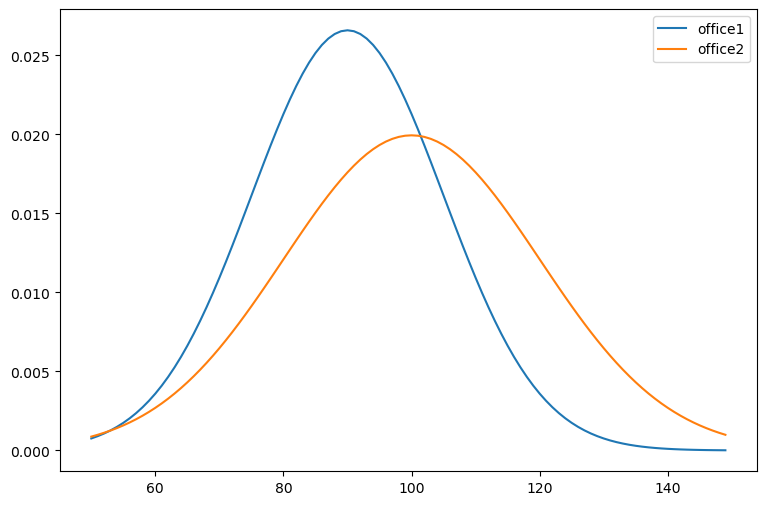

In [200]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office1')
plt.plot(x, y2, label = 'office2')
plt.legend()

t-test from stats - 9 times out of 10 we won't use this below

In [220]:
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

### 3. Load the mpg dataset and use it to answer the following questions:

In [48]:
# mpg = sns.load_dataset('mpg')

In [3]:
from pydataset import data
mpg = data('mpg')

In [67]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H{0}$ : There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H{a}$ : There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [77]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [93]:
mpg.groupby('year').avg_mpg.mean()

year
1999    20.222222
2008    20.076923
Name: avg_mpg, dtype: float64

In [125]:
avg_mpg_99 = mpg[mpg['year'] == 1999].avg_mpg.mean()
avg_mpg_99

20.22222222222222

In [126]:
avg_mpg_08 = mpg[mpg['year'] == 2008].avg_mpg.mean()
avg_mpg_08

20.076923076923077

In [127]:
mpg[mpg['year'] == 1999].avg_mpg.var()

27.122605363984682

In [128]:
mpg[mpg['year'] == 2008].avg_mpg.var()

24.097480106100797

In [132]:
mpg_99 = mpg[mpg['year'] == 1999].avg_mpg

In [133]:
mpg_08 = mpg[mpg['year'] == 2008].avg_mpg

In [135]:
stat, pval = stats.levene(mpg_99, mpg_08)
stat, pval

(0.033228136671080453, 0.855517569468803)

In [223]:
t, p = stats.ttest_ind(mpg_99, mpg_08, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

We cannot reject $H{0}$

In [224]:
if p < a:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


<AxesSubplot:>

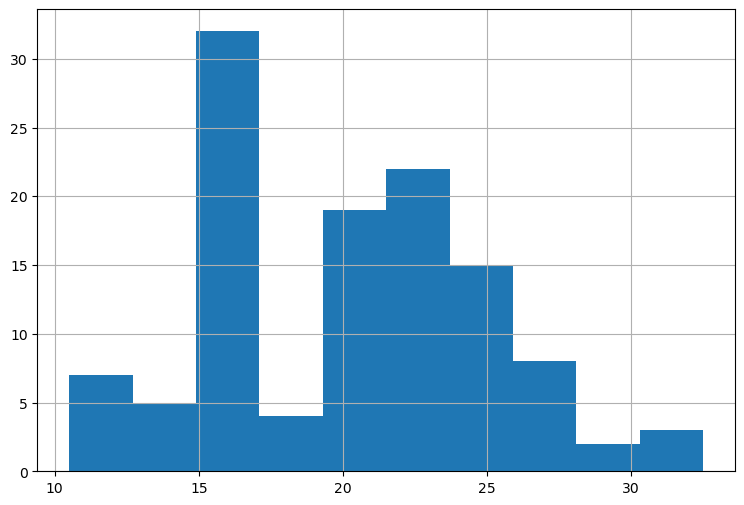

In [221]:
plt.figure(figsize=(9,6))
mpg_08.hist()

<AxesSubplot:>

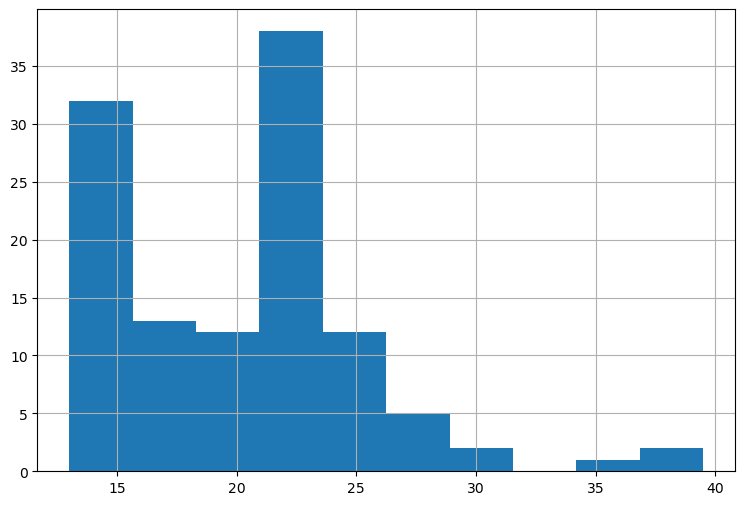

In [222]:
plt.figure(figsize=(9,6))
mpg_99.hist()

#### Are compact cars more fuel-efficient than the average car?

$H{0}$ : There is no difference in fuel-efficiency in compact cars vs the average car.

$H{a}$ : Compact cars are more fuel-efficient than the average car.

In [143]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [152]:
mpg[mpg['class']=='compact'].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [153]:
mpg[mpg['class']=='compact']['avg_mpg'].mean()

24.21276595744681

In [156]:
mpg.avg_mpg.mean()

20.14957264957265

In [161]:
avg_com_mpg = mpg[mpg['class']=='compact']['avg_mpg']

In [162]:
avg_car_mpg = mpg.avg_mpg

In [163]:
stat, pval = stats.levene(avg_com_mpg, avg_car_mpg)
stat, pval

(11.96025508756341, 0.0006283349942996054)

In [226]:
t, p = stats.ttest_1samp(avg_com_mpg, mpg.avg_mpg.mean())
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

We can reject $H{0}$

<AxesSubplot:>

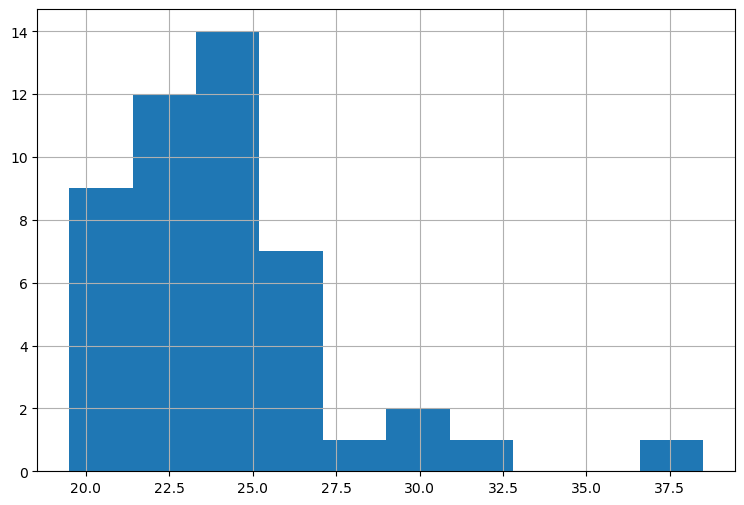

In [225]:
plt.figure(figsize=(9,6))
avg_com_mpg.hist()

In [227]:
if ((p/2) < a) and (t > 0):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


#### Do manual cars get better gas mileage than automatic cars?

$H{0}$ : There is no difference in fuel-efficiency in automatic vs manual cars.

$H{a}$ : There is a difference in fuel-efficiency in automatic vs manual cars.

In [169]:
mpg['is_automatic'] = mpg.trans.str.contains('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


In [173]:
mpg[mpg['is_automatic']].avg_mpg.mean()

19.130573248407643

In [192]:
mpg[mpg['is_automatic']==0].avg_mpg.mean()

22.227272727272727

In [193]:
auto_mpg = mpg[mpg['is_automatic']].avg_mpg

In [194]:
manual_mpg = mpg[mpg['is_automatic']==0].avg_mpg

In [195]:
stat, pval = stats.levene(auto_mpg, manual_mpg)
stat, pval

(0.20075824847529639, 0.6545276355131857)

In [232]:
t, p = stats.ttest_ind(auto_mpg, manual_mpg, equal_var=True)
t, p/2

(-4.593437735750014, 3.5771872005728424e-06)

We can reject $H{0}$

In [233]:
if p < a:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


<AxesSubplot:>

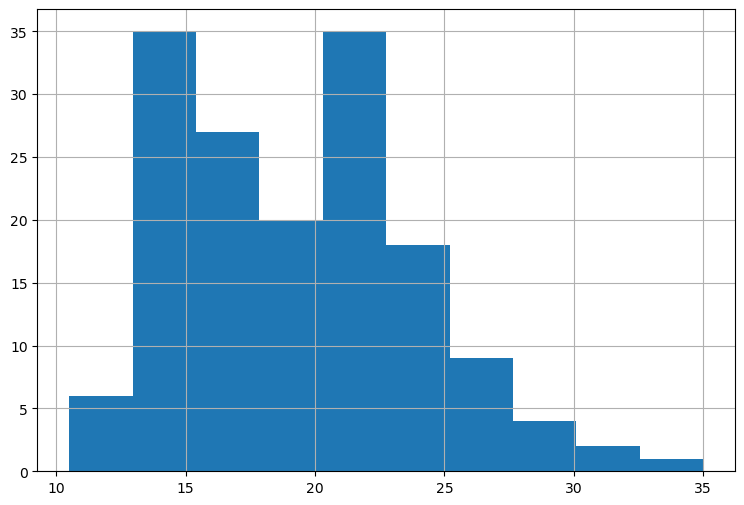

In [228]:
plt.figure(figsize=(9,6))
auto_mpg.hist()

<AxesSubplot:>

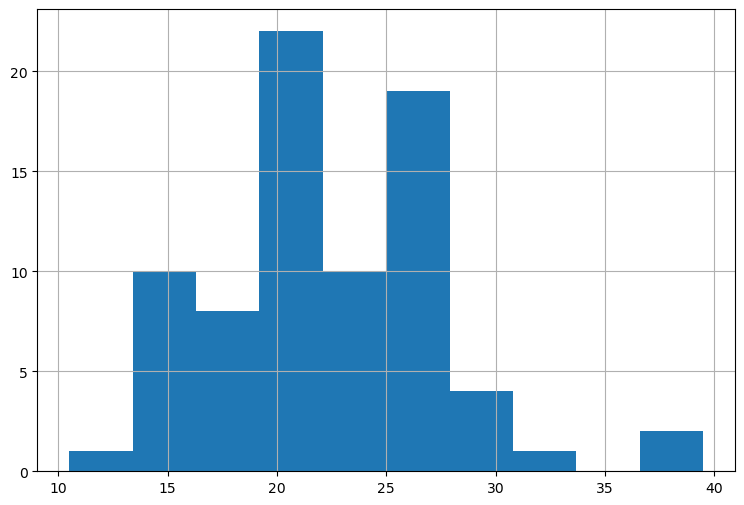

In [229]:
plt.figure(figsize=(9,6))
manual_mpg.hist()

# Correlation Exercises

#### 1. Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?
> Correlation test. stats.pearsonr

Do guys and gals quit their jobs at the same rate?
> 2 sample T-test. 2 tail

Does the length of time of the lecture correlate with a students grade?
> Correlation test. stats.pearsonr

### 2. Use the telco_churn data.
#### Does tenure correlate with monthly charges?

$H_0$: There is no linear correlation between tenure and monthly charges

$H_a$: There is a linear relationship between tenure and monthly charges

In [22]:
a = 0.05

In [2]:
url = get_db_url('telco_churn')

In [69]:
telco_churn = pd.read_sql('select * from customers', url)

In [5]:
telco_churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [11]:
telco_churn.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [12]:
telco_churn.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

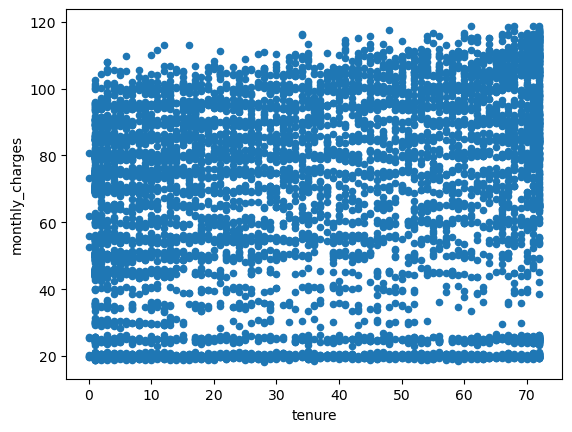

In [20]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.monthly_charges)
r, p

telco_churn.plot.scatter('tenure', 'monthly_charges')

In [21]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.monthly_charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

In [23]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

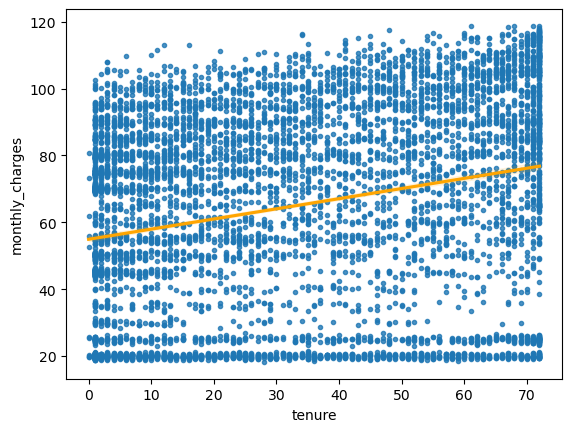

In [155]:
sns.regplot(x='tenure', y='monthly_charges', data=telco_churn, marker='.', line_kws={'color': 'orange'})

<AxesSubplot:>

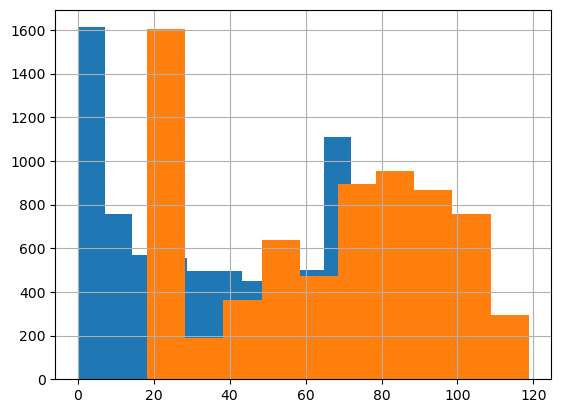

In [157]:
telco_churn.tenure.hist()
telco_churn.monthly_charges.hist()

#### Total charges?

$H_0$: There is no linear correlation between tenure and total charges

$H_a$: There is a linear relationship between tenure and total charges

In [70]:
telco_churn.total_charges = telco_churn.total_charges.str.replace(' ', '0')

In [76]:
telco_churn.total_charges = telco_churn.total_charges.astype(float)

In [77]:
telco_churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

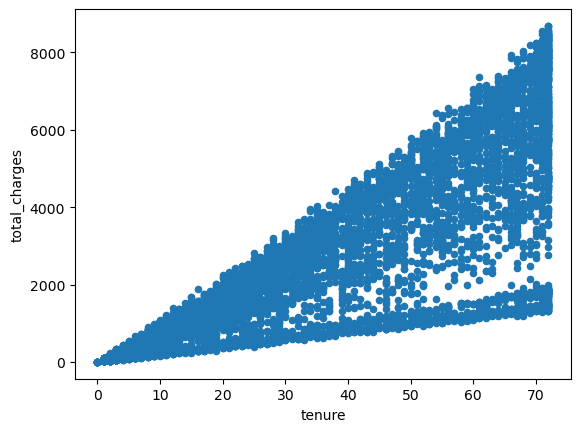

In [80]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.total_charges)
r, p

telco_churn.plot.scatter('tenure', 'total_charges')

In [81]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.total_charges)
r, p

(0.8261783979502481, 0.0)

In [82]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

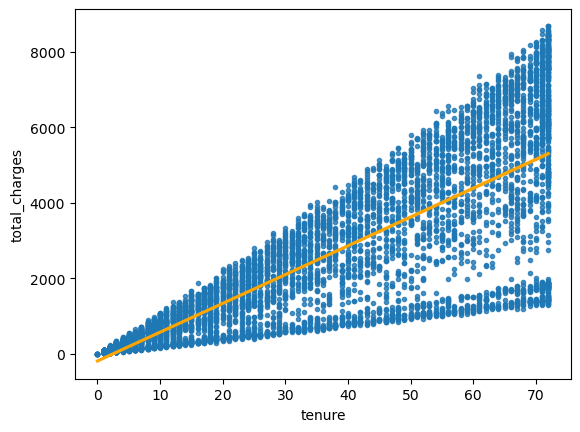

In [158]:
sns.regplot(x='tenure', y='total_charges', data=telco_churn, marker='.', line_kws={'color': 'orange'})

#### What happens if you control for phone and internet service?

In [26]:
telco_churn.internet_service_type_id.value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [83]:
df = pd.read_sql('select * from customers join internet_service_types using(internet_service_type_id)', url)
df.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [84]:
df.total_charges = df.total_charges.str.replace(' ', '0')

In [85]:
df.total_charges = df.total_charges.astype(float)

In [107]:
has_phone_service = df[df.phone_service == 'Yes']

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

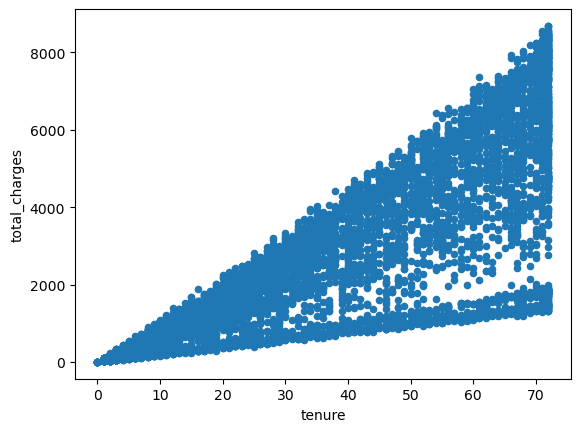

In [115]:
r, p = stats.pearsonr(has_phone_service.tenure, has_phone_service.total_charges)
r, p

telco_churn.plot.scatter('tenure', 'total_charges')

In [118]:
r, p = stats.pearsonr(has_phone_service.tenure, has_phone_service.total_charges)
r, p

(0.8301076972900466, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

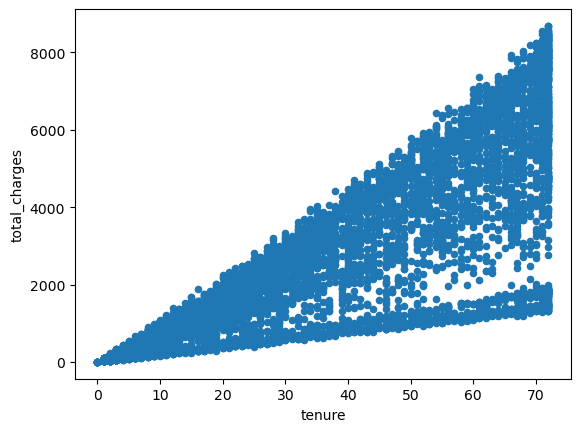

In [123]:
r, p = stats.pearsonr(has_internet_service.tenure, has_internet_service.total_charges)
r, p

telco_churn.plot.scatter('tenure', 'total_charges')

In [153]:
r, p = stats.pearsonr(has_internet_service.tenure, has_internet_service.total_charges)
r, p

(0.9320165580130597, 0.0)

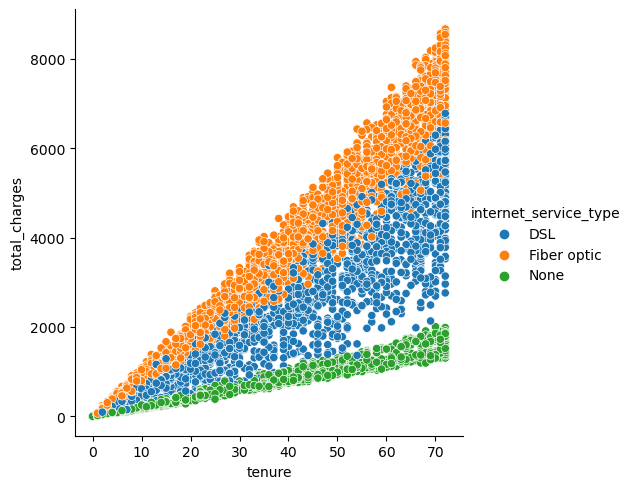

In [125]:
sns.relplot(data=df, x='tenure', y='total_charges', hue='internet_service_type')
plt.show()

In [108]:
has_internet_service = df[df.internet_service_type_id != 3]

In [154]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 3. Use the employees database.

#### Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: There is no linear correlation between tenure and salary

$H_a$: There is a linear relationship between tenure and salary

In [17]:
url = get_db_url('employees')

In [130]:
emp1 = pd.read_sql('''select *, round((datediff(now(),hire_date)) / 365, 2) as tenure
                        from employees
                        join salaries using(emp_no)
                        where to_date > now()
                        '''
                        , url)

In [133]:
emp1.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,36.82
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,37.41
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,36.64
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,36.38
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,33.60


<AxesSubplot:xlabel='tenure', ylabel='salary'>

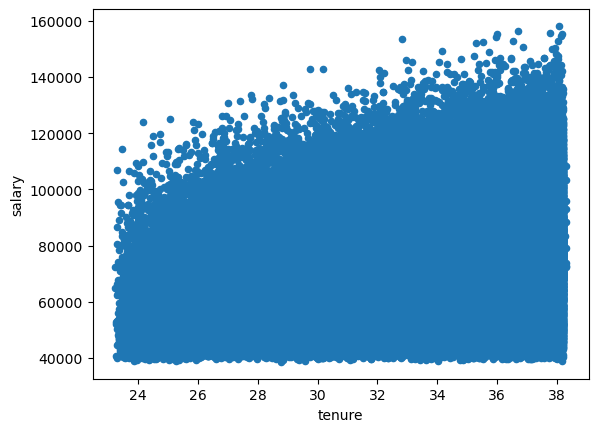

In [136]:
r, p = stats.pearsonr(emp1.tenure, emp1.salary)
r, p
emp1.plot.scatter('tenure', 'salary')

In [151]:
r, p = stats.pearsonr(emp1.tenure, emp1.salary)
r, p

(0.30646324426557225, 0.0)

In [152]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


<AxesSubplot:xlabel='tenure', ylabel='salary'>

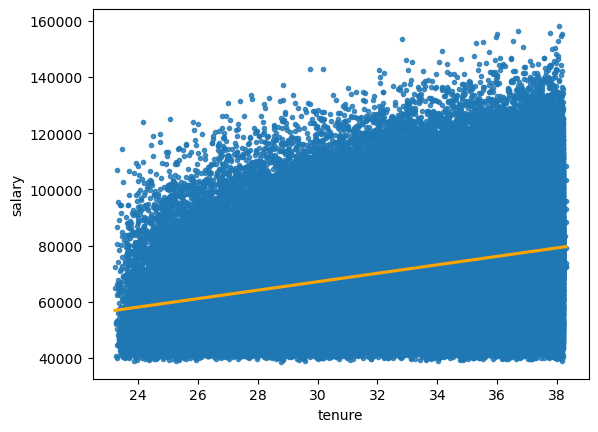

In [160]:
sns.regplot(x='tenure', y='salary', data=emp1, marker='.', line_kws={'color': 'orange'})

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [138]:
emp_titles = pd.read_sql('''
                            select emp_no, count(title) as number_of_titles, round((datediff(now(),hire_date)) / 365, 2) as tenure
                            from employees
                            join titles using(emp_no)
                            group by emp_no
                        '''
                        , url)

In [139]:
emp_titles.head()

,emp_no,number_of_titles,tenure
0,10001,1,36.82
1,10002,1,37.41
2,10003,1,36.64
3,10004,2,36.38
4,10005,2,33.60


In [149]:
r, p = stats.pearsonr(emp_titles.tenure, emp_titles.number_of_titles)
r, p

(0.2665986257217501, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='number_of_titles'>

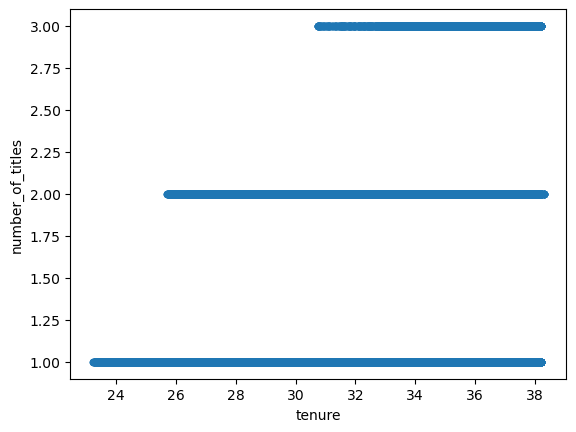

In [142]:
r, p = stats.pearsonr(emp_titles.tenure, emp_titles.number_of_titles)
r, p

emp_titles.plot.scatter('tenure', 'number_of_titles')

<AxesSubplot:xlabel='tenure', ylabel='number_of_titles'>

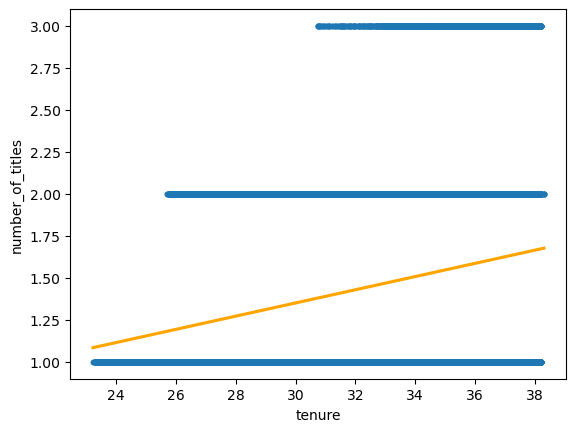

In [161]:
sns.regplot(x='tenure', y='number_of_titles', data=emp_titles, marker='.', line_kws={'color': 'orange'})

In [150]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 4. Use the sleepstudy data.
Is there a relationship between days and reaction time?

$H_0$: There is no linear correlation between days and reaction time

$H_a$: There is a linear relationship between days and reaction time

In [143]:
from pydataset import data
sleep = data('sleepstudy')

In [144]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [145]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

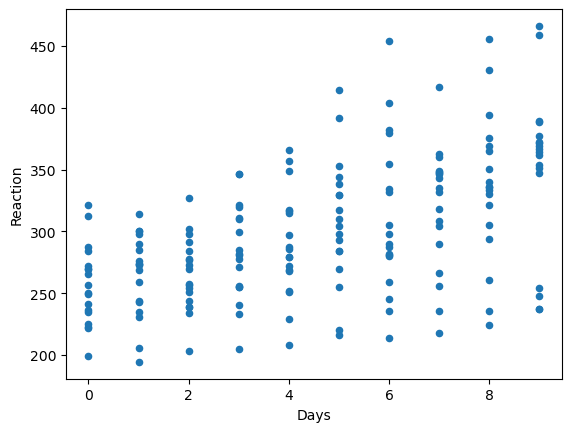

In [147]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
r, p

sleep.plot.scatter('Days', 'Reaction')

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

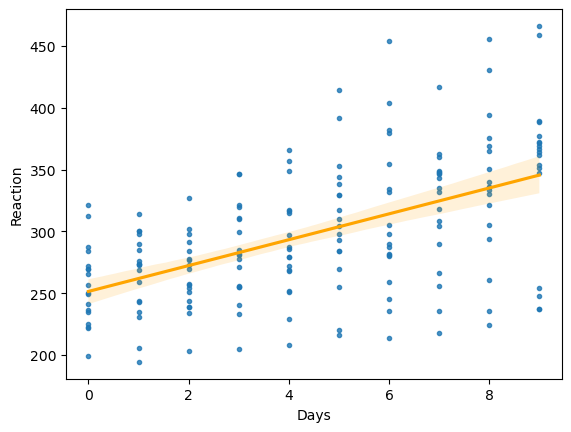

In [162]:
sns.regplot(x='Days', y='Reaction', data=sleep, marker='.', line_kws={'color': 'orange'})

In [148]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Exercises Comparing Group Membership

#### 1. Answer with the type of stats test you would use (assume normal distribution):

* #### Do students get better test grades if they have a rubber duck on their desk?

>  T-test

* #### Does smoking affect when or not someone has lung cancer?

> Chi-Square Contingency Table Test

smoking is discrete, yes/no. lung cancer is also discrete, yes/no

* #### Is gender independent of a person’s blood type?

> Chi-Square Contingency Table Test

gender is discrete, blood type is discrete

* #### A farming company wants to know if a new fertilizer has improved crop yield or not

> 2 sample T-test, 1 tail

compare the means of 2 groups

* #### Does the length of time of the lecture correlate with a students grade?

> correlation stats.pearsonr

len(lecture) continuous, student grades continuous

* #### Do people with dogs live in apartments more than people with cats?

> Chi-Square contingency table test

has dog or cat == discrete, lives in apartment or not == discrete

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                            Codeup Student       Not Codeup Student
     Uses a Macbook               49                     20
     Doesn't use macbook           1                     30

$H_0$: There is **no** association between macbook use and student status

$H_a$: There is association between macbook use and student status

In [51]:
observed = [[49, 20],[1,30]]
observed

[[49, 20], [1, 30]]

In [55]:
observed = pd.DataFrame(observed)

In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [56]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p.    = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]
n----
chi^2 = 36.6526
p.    = 0.0000


In [57]:
if p < a:
    print('We reject the null')
else:
    print('We fail to reject the null')

We reject the null


#### 3. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

$H_0$: There is **no** association between cyl and class

$H_a$: There is association between cyl and class

In [15]:
a = 0.05

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
observed = pd.crosstab(mpg['class'], mpg.cyl)
observed

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [11]:
stats.chi2_contingency(observed)

(138.02824375973245,
 1.5351076620141742e-20,
 18,
 array([[ 1.73076923,  0.08547009,  1.68803419,  1.4957265 ],
        [16.26923077,  0.8034188 , 15.86752137, 14.05982906],
        [14.19230769,  0.7008547 , 13.84188034, 12.26495726],
        [ 3.80769231,  0.18803419,  3.71367521,  3.29059829],
        [11.42307692,  0.56410256, 11.14102564,  9.87179487],
        [12.11538462,  0.5982906 , 11.81623932, 10.47008547],
        [21.46153846,  1.05982906, 20.93162393, 18.54700855]]))

In [13]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [14]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p.    = {p:.4f}')

Observed
[[ 0  0  0  5]
 [32  2 13  0]
 [16  0 23  2]
 [ 1  0 10  0]
 [ 3  0 10 20]
 [21  2  7  5]
 [ 8  0 16 38]]

Expected
[[ 1  0  1  1]
 [16  0 15 14]
 [14  0 13 12]
 [ 3  0  3  3]
 [11  0 11  9]
 [12  0 11 10]
 [21  1 20 18]]
n----
chi^2 = 138.0282
p.    = 0.0000


In [16]:
if p < a:
    print('We reject the null')
else:
    print('We fail to reject the null')

We reject the null


#### 4. Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: There is **no** association between gender and whether an employee works in sales or marketing

$H_a$: There is association between gender and whether an employee works in sales or marketing

In [18]:
emp3 = pd.read_sql('''
select * 
from employees
join dept_emp using(emp_no)
join departments using(dept_no)
where dept_name like 'sales'
	or dept_name like 'marketing'
	and  dept_emp.to_date > now()
                        '''
                        , url)

In [19]:
emp3.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


In [21]:
emp3.dept_name.value_counts()

Sales        52245
Marketing    14842
Name: dept_name, dtype: int64

In [23]:
observed = pd.crosstab(emp3.gender, emp3.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,20854
M,8978,31391


In [24]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [25]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p.    = {p:.4f}')

Observed
[[ 5864 20854]
 [ 8978 31391]]

Expected
[[ 5910 20807]
 [ 8931 31437]]
n----
chi^2 = 0.7793
p.    = 0.3774


In [26]:
if p < a:
    print('We reject the null')
else:
    print('We fail to reject the null')

We fail to reject the null


* Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: There is **no** association between gender and whether or not they are or have been a manager

$H_a$: There is association between gender and whether or not they are or have been a manager

In [31]:
# pulled query from mysql
emp_managers = pd.read_sql('''
select * 
from employees
join titles using(emp_no)
                           '''
                        , url)

In [44]:
# since we needed to know who managers were, ran .unique() to find all unique titles
emp_managers.title.unique()

array(['not_manager', 'Manager'], dtype=object)

In [43]:
# after identifying unique titles, ran .replace() and passed a list of unique titles to replace with not_manager
#end result is we now had titles of manager and not_manager
emp_managers.title = emp_managers.title.replace(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff', 'Assistant Engineer', 'Technique Leader' ], 'not_manager')

In [60]:
# created crosstabe of managers and not_not managers and saved variable to observed
observed = pd.crosstab(emp_managers.gender, emp_managers.title)
observed

title,Manager,not_manager
gender,,
F,13,177211
M,11,266073


#### start our test

In [47]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [48]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p.    = {p:.4f}')

Observed
[[    13 177211]
 [    11 266073]]

Expected
[[     9 177214]
 [    14 266069]]
n----
chi^2 = 1.4658
p.    = 0.2260


In [49]:
if p < a:
    print('We reject the null')
else:
    print('We fail to reject the null')

We fail to reject the null


### Define function

In [58]:
def chi2_test(table):
    chi2, p, degf, expected = stats.chi2_contingency(table)
    print('Observed')
    print(observed.values)
    print('\nExpected')
    print(expected.astype(int))
    print('n----')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p.    = {p:.4f}')

In [61]:
chi2_test(observed)

Observed
[[    13 177211]
 [    11 266073]]

Expected
[[     9 177214]
 [    14 266069]]
n----
chi^2 = 1.4658
p.    = 0.2260
